In [125]:
# %run "../../../common/0_notebooks_base_setup.py"   

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles, que usaremos para resolver ejercicios de Numpy, Estadística y Probabilidad.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [126]:
## [BORRAR_PRESENCIAL]

import numpy as np

# local:
data_location = '../Data/sales_data_sample_excercise.csv'
data = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype= str)
data


array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

In [127]:
import seaborn as sns

def distribution_plotter(data, label, color = 'steelblue',
                         bin_width=200):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width,
                       color = color)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

## Ejercicio 2

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución normal.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [128]:
sales_usa = data[data[:, 5] == "USA"][:, 1].astype("float")
sales_usa_std = np.std(sales_usa)
sales_usa_mean = np.mean(sales_usa)
sales_usa_median = np.median(sales_usa)
sales_usa_range = np.max(sales_usa) - np.min(sales_usa)
print(f"media: {sales_usa_mean} mediana: {sales_usa_median} rango: {sales_usa_range} desvio: {sales_usa_std} {sales_usa.size}")

media: 3613.5287151394423 mediana: 3236.06 rango: 13541.66 desvio: 1879.9971929724536 1004


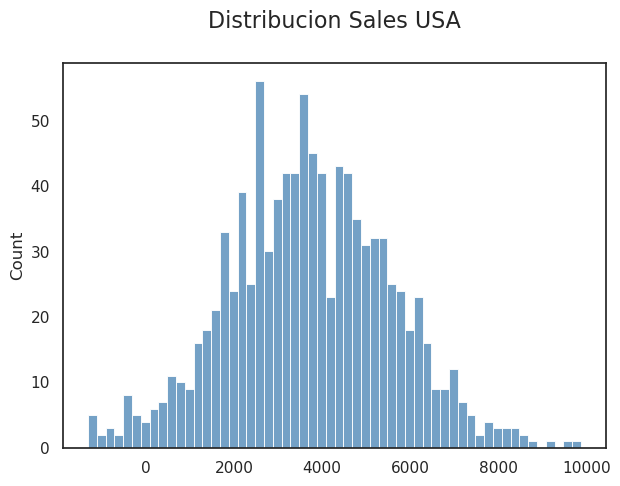

In [129]:
random_generator = np.random.default_rng(737)
sales_usa_generated = random_generator.normal(loc=sales_usa_mean, scale=sales_usa_std, size=1004)
distribution_plotter(sales_usa_generated, "Sales USA")

## Ejercicio 3

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados

Ayuda: https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [130]:
all_data = np.concatenate((sales_usa, sales_usa_generated))
print(f"media: {all_data.mean()}, mediana: {np.median(all_data)}, rango: {all_data.max()-all_data.min()}, std: {all_data.std()}")


media: 3658.570203589915, mediana: 3456.047090632147, rango: 15403.021817462093, std: 1865.1025314863966


## Ejercicio 4

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución uniforme.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

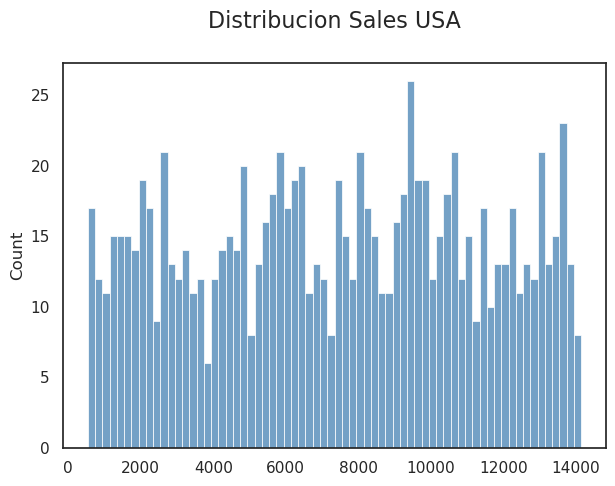

In [131]:
random_uniform_data = random_generator.uniform(low=np.min(sales_usa), high=np.max(sales_usa), size=1004)
distribution_plotter(random_uniform_data, "Sales USA")

## Ejercicio 5

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados.

In [132]:
all_data_2 = np.concatenate((sales_usa, random_uniform_data))
print(f"media: {all_data_2.mean()}, mediana: {np.median(all_data_2)}, rango: {all_data_2.max()-all_data_2.min()}, std: {all_data_2.std()}")


media: 5510.323290388371, mediana: 4452.645354723341, rango: 13541.66, std: 3582.187903152373


## Ejercicio 6

¿Cuál de las dos imputaciones de datos preservó mejor la distribución original?

In [133]:
print(f"original media: {sales_usa_mean} mediana: {sales_usa_median} rango: {sales_usa_range} desvio: {sales_usa_std}")
print(f"normal media: {all_data.mean()}, mediana: {np.median(all_data)}, rango: {all_data.max()-all_data.min()}, desvio: {all_data.std()}")
print(f"uniforme media: {all_data_2.mean()}, mediana: {np.median(all_data_2)}, rango: {all_data_2.max()-all_data_2.min()}, desvio: {all_data_2.std()}")



original media: 3613.5287151394423 mediana: 3236.06 rango: 13541.66 desvio: 1879.9971929724536
normal media: 3658.570203589915, mediana: 3456.047090632147, rango: 15403.021817462093, desvio: 1865.1025314863966
uniforme media: 5510.323290388371, mediana: 4452.645354723341, rango: 13541.66, desvio: 3582.187903152373


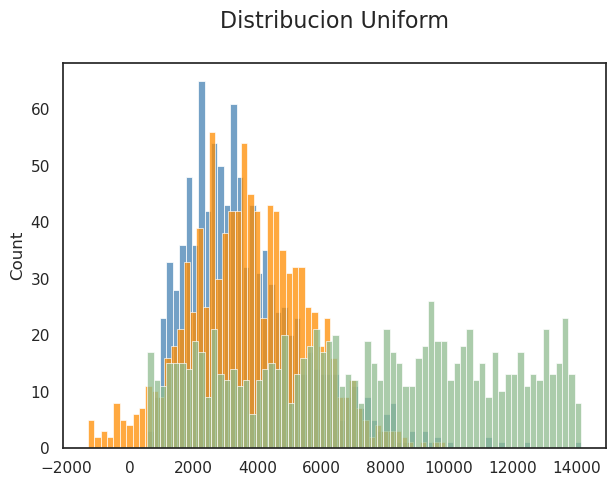

In [134]:

distribution_plotter(sales_usa, "Sales USA")
distribution_plotter(sales_usa_generated, "Normal", color="darkorange")
distribution_plotter(random_uniform_data, "Uniform", color="darkseagreen")
